In [1]:
import os
import pandas as pd
os.chdir("/home/adrianhurtado/testing/madness-test-suite/high")
from madnessReader import MadnessReader
from madnessReader import ExcitedData
from madnessReader import FrequencyData
from daltonRunner import DaltonRunner

/home/adrianhurtado/testing/madness-test-suite/high
/home/adrianhurtado/testing/madness-test-suite/high/..
/home/adrianhurtado/testing/madness-test-suite/high


In [2]:
def excited_results(mol):
    
    f_data=ExcitedData(mol,'hf')
    f_data.plot_density_residuals()
    f_data.plot_bsh_residuals()
    ground,omega_df=f_data.compare_dalton('d-aug-cc-pVQZ')
    print(ground)
    print(omega_df)
def freq_results(mol):
    ff_data=FrequencyData(mol,'hf','dipole')
    #ff_data.plot_density_residuals()
    #ff_data.plot_bsh_residuals()
    #ff_data.polar_df
    ff_data.plot_polar_data('t-aug-cc-pVQZ',['xx','yy','zz'])
    #ground,dal_results,mad_results,diff_df=ff_data.compare_dalton('d-aug-cc-pVQZ')
    #print(ground)
    #print(mad_results)
    #diff_df.set_index('frequencies')[['xx','yy','zz']].plot(title='mad-dalton')

,d-aug-cc-pVDZ,d-aug-cc-pVTZ,d-aug-cc-pVQZ,MRA
Frequency,,,,
0.0,8.466035,8.525102,8.532258,8.531512
0.0198666875,8.475112,8.534237,8.541396,8.540660
0.039733375,8.502528,8.561827,8.568994,8.568258
0.07946675,8.615024,8.675069,8.682265,8.681534
0.1589335,9.117205,9.181109,9.188398,9.172253


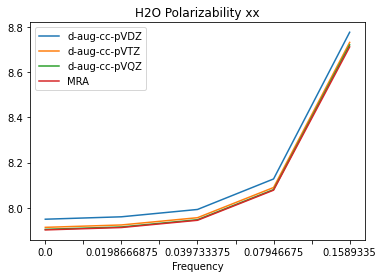

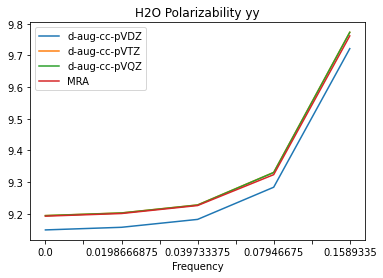

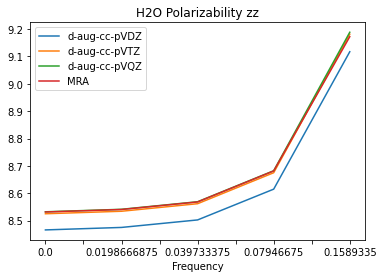

In [3]:
moldata=FrequencyData('H2O','hf','dipole')
basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ']
moldata.compare_polar_basis_list('xx',basis_list)
moldata.compare_polar_basis_list('yy',basis_list)
moldata.compare_polar_basis_list('zz',basis_list)


In [4]:
# Water
# aug-cc-pvNZ

basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ']
def basis_set_results(mol,basis_list):
    moldata=FrequencyData(mol,'hf','dipole')
    
    xx_aug=moldata.compare_polar_basis_list('xx',basis_list)
    yy_aug=moldata.compare_polar_basis_list('yy',basis_list)
    zz_aug=moldata.compare_polar_basis_list('zz',basis_list)
    xx_aug=moldata.compare_diff_basis_list('xx',basis_list)
    yy_aug=moldata.compare_diff_basis_list('yy',basis_list)
    zz_aug=moldata.compare_diff_basis_list('zz',basis_list)
    
    d_xx_aug=moldata.compare_polar_basis_list('xx',d_basis_list)
    d_yy_aug=moldata.compare_polar_basis_list('yy',d_basis_list)
    d_zz_aug=moldata.compare_polar_basis_list('zz',d_basis_list)
    xx_aug=moldata.compare_diff_basis_list('xx',d_basis_list)
    yy_aug=moldata.compare_diff_basis_list('yy',d_basis_list)
    zz_aug=moldata.compare_diff_basis_list('zz',d_basis_list)


C2H2
He


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


HF
what happened  HF
NH3
what happened  NH3
Ne
H2
HCl
what happened  HCl
H2O
CH4
BeH2
Be


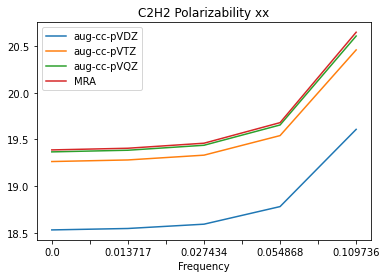

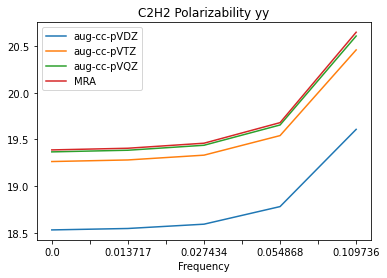

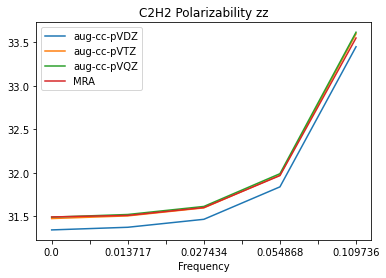

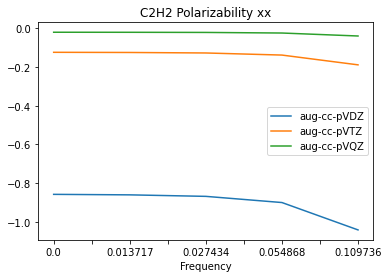

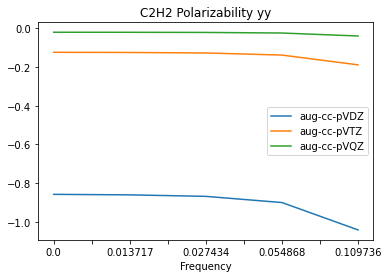

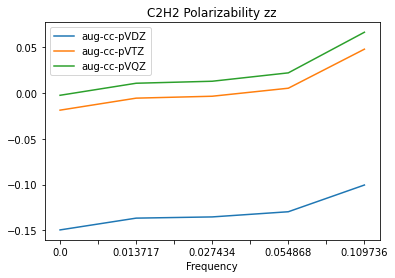

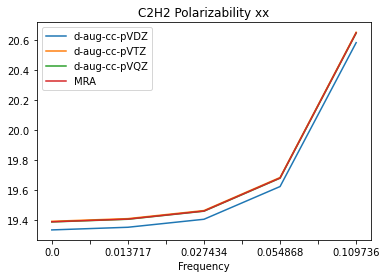

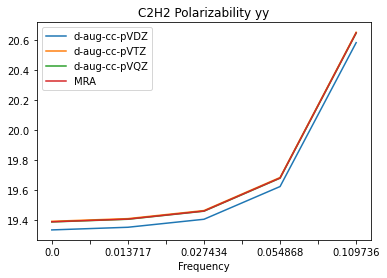

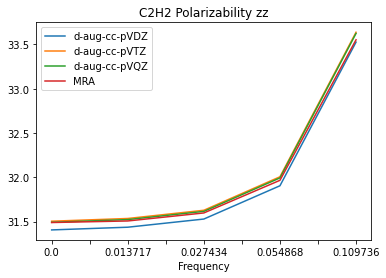

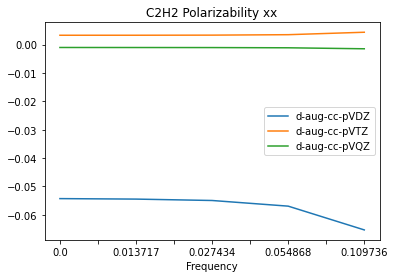

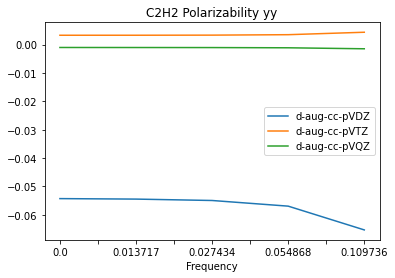

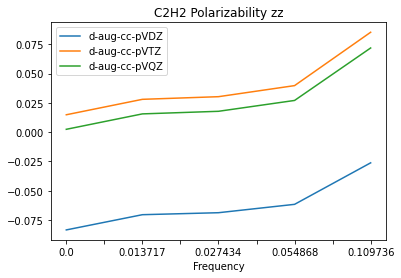

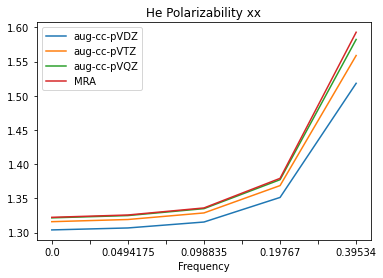

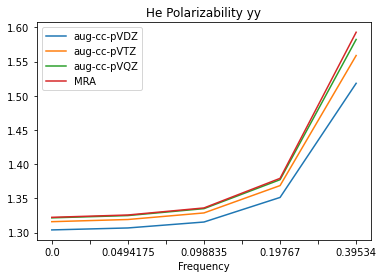

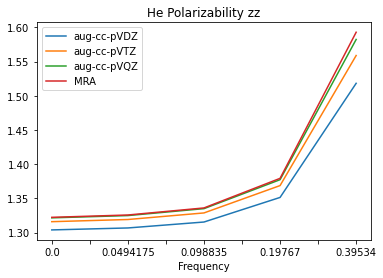

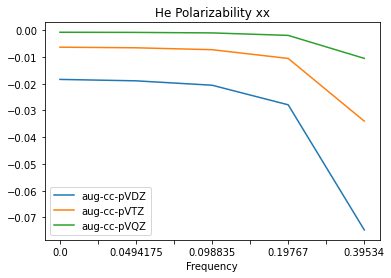

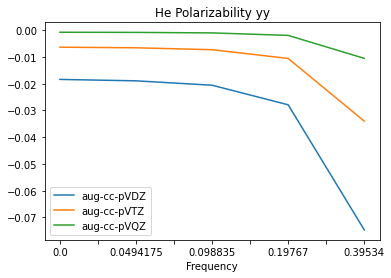

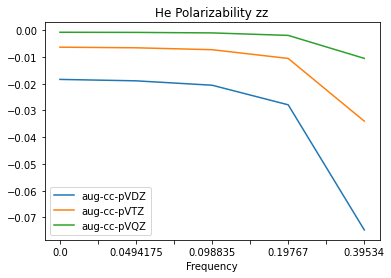

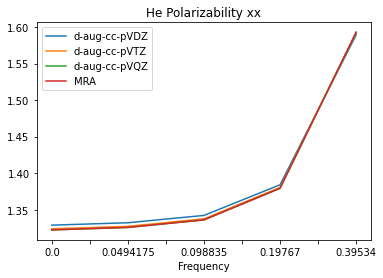

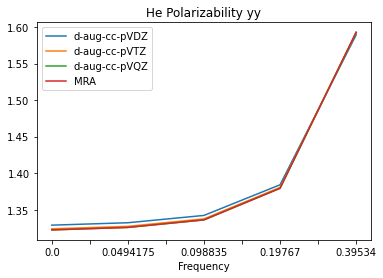

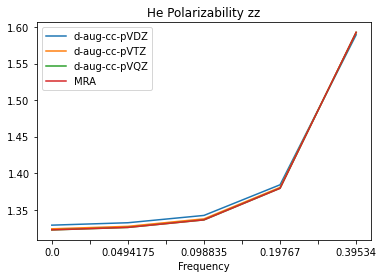

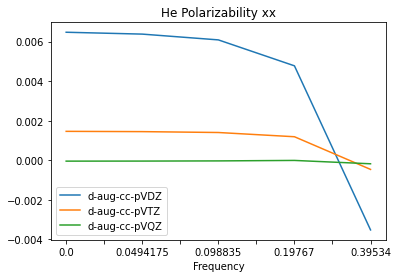

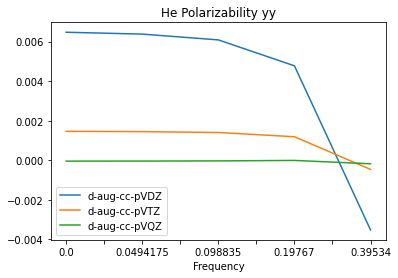

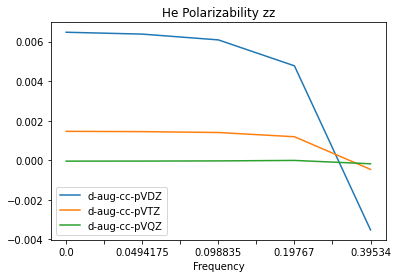

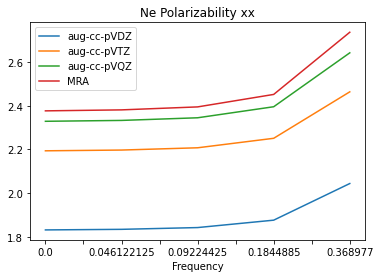

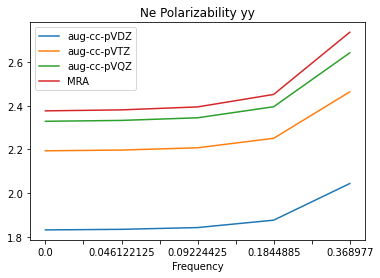

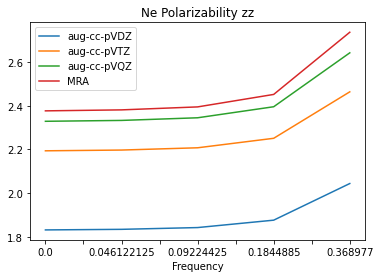

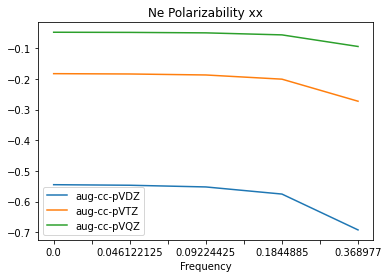

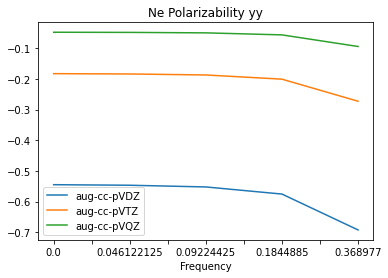

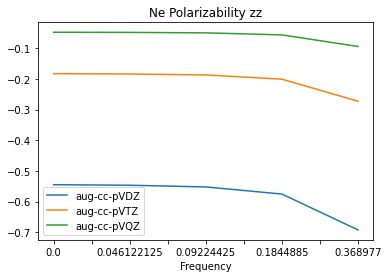

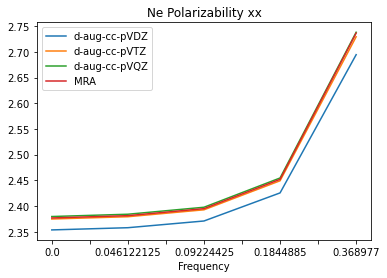

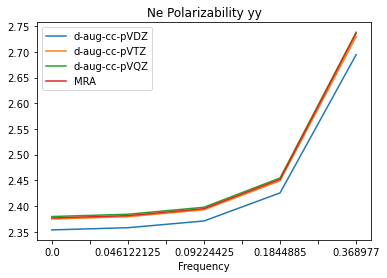

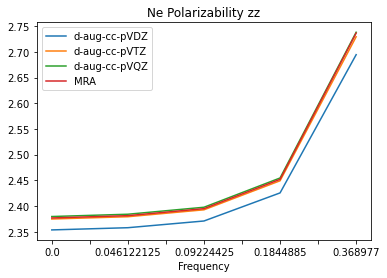

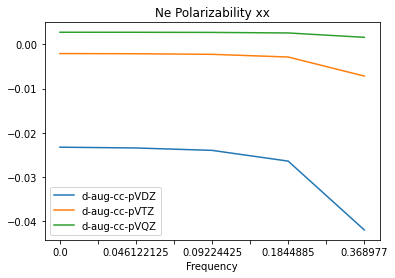

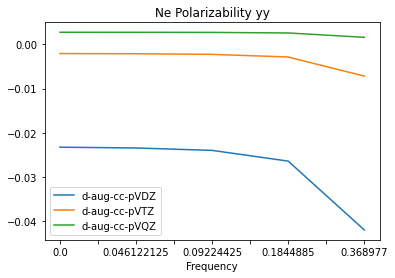

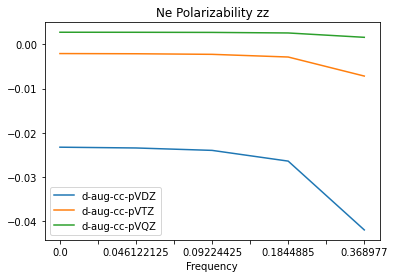

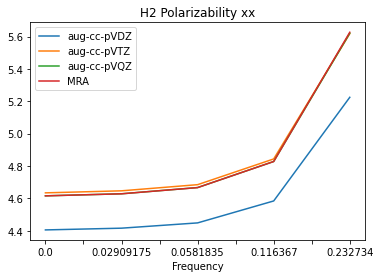

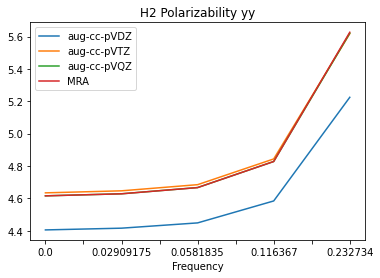

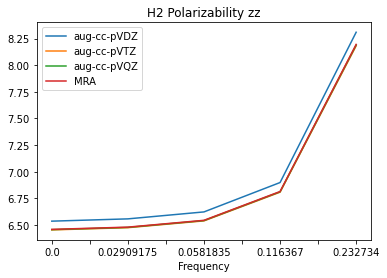

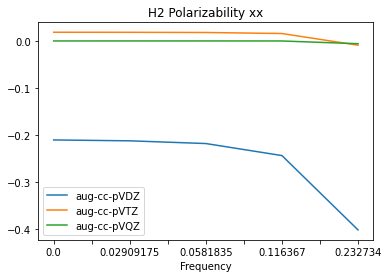

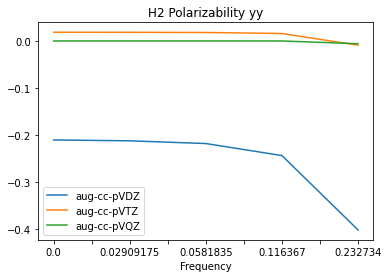

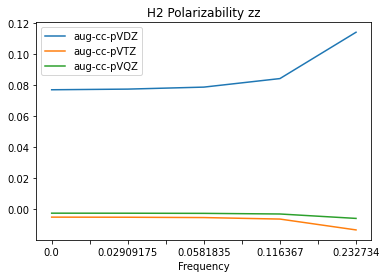

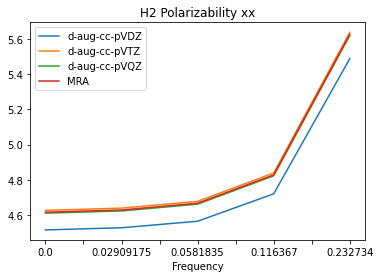

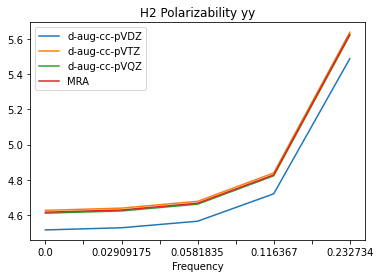

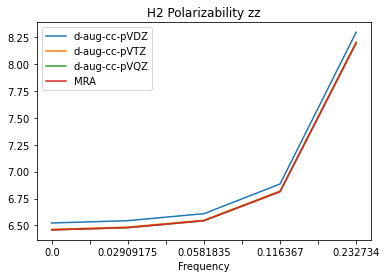

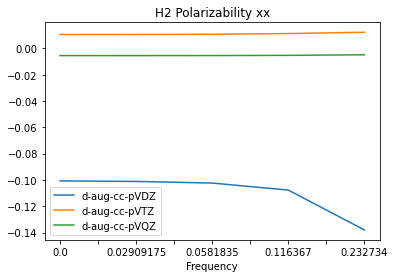

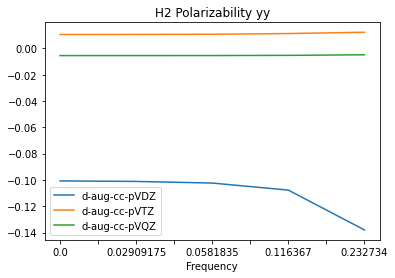

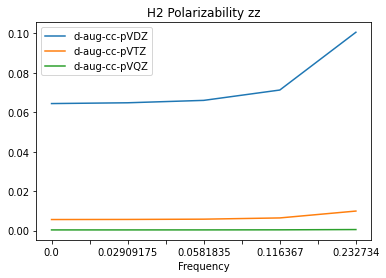

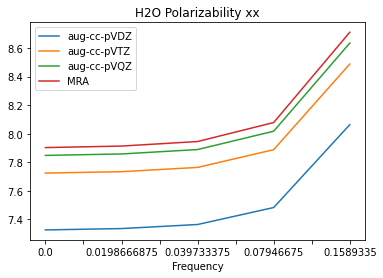

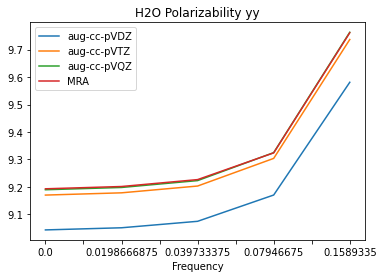

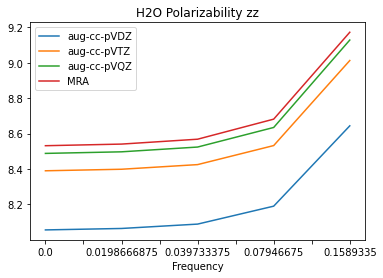

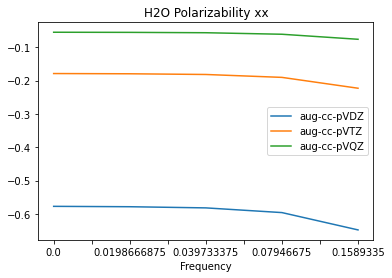

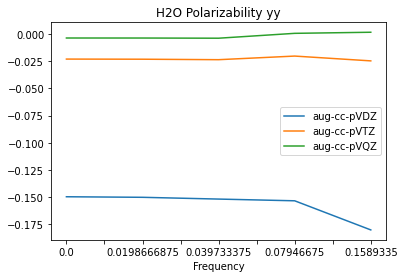

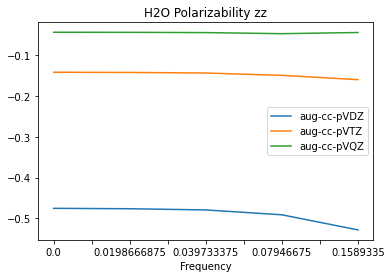

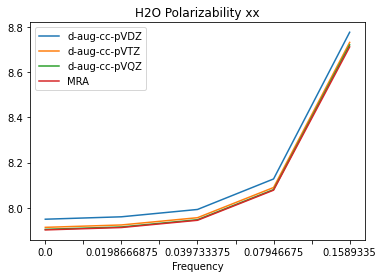

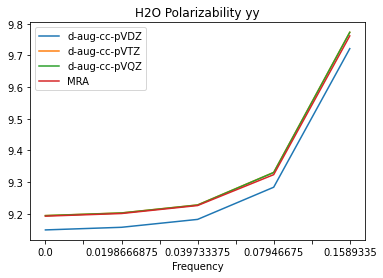

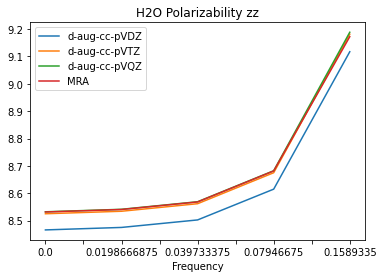

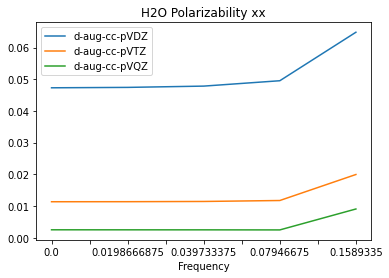

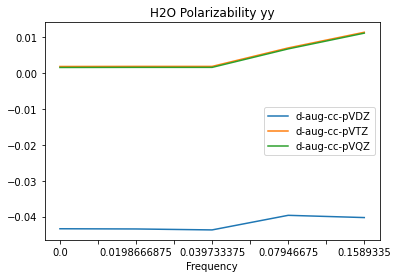

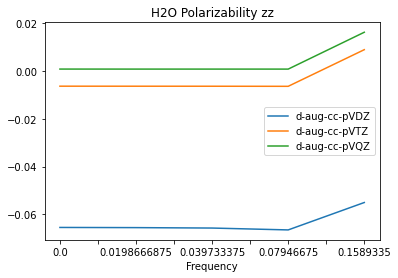

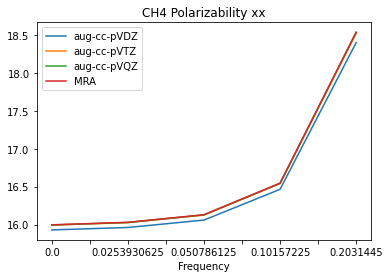

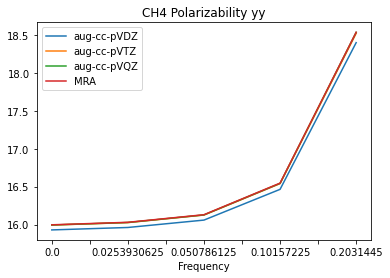

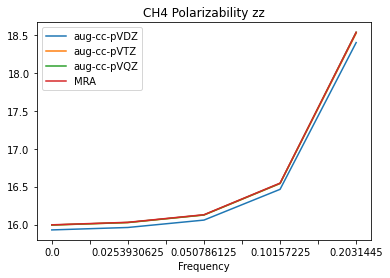

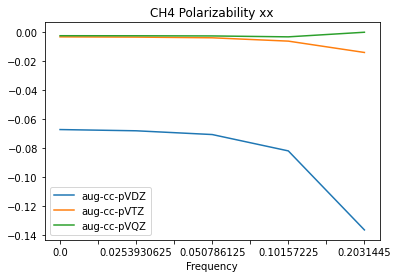

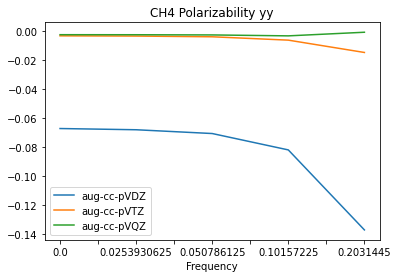

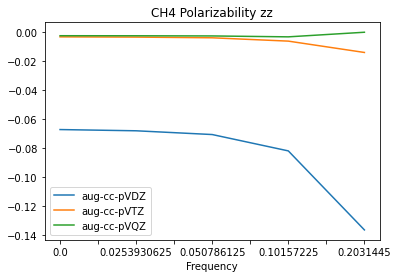

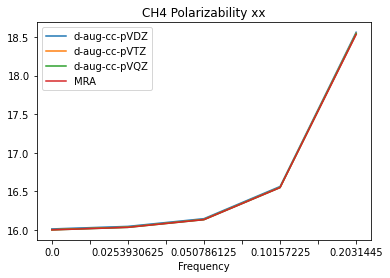

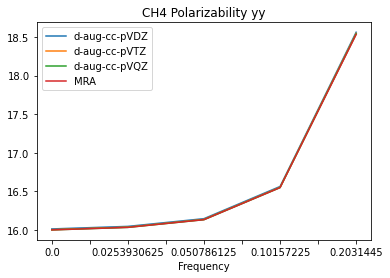

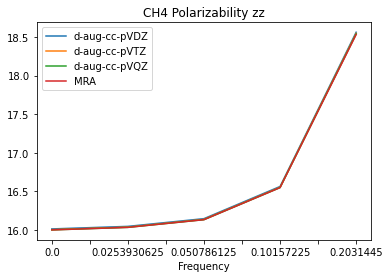

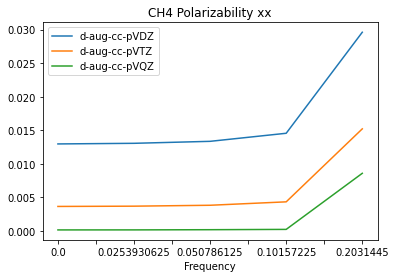

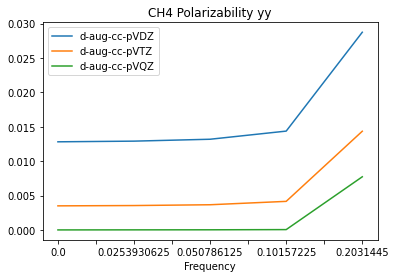

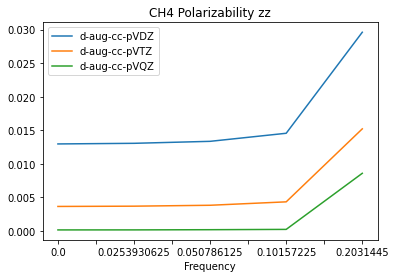

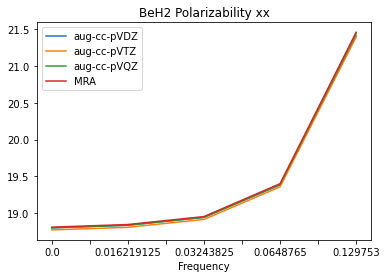

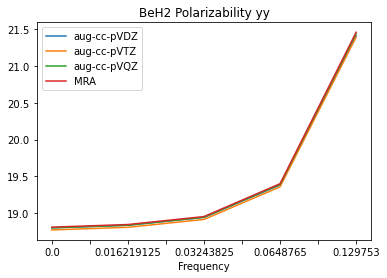

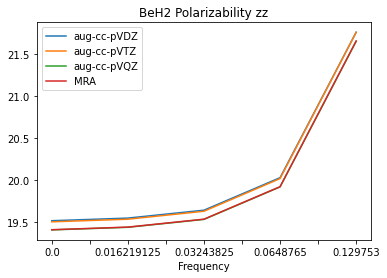

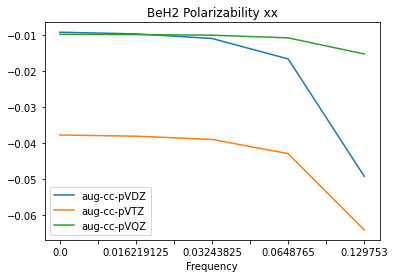

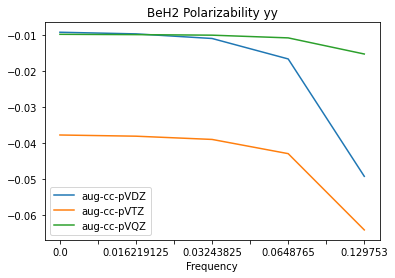

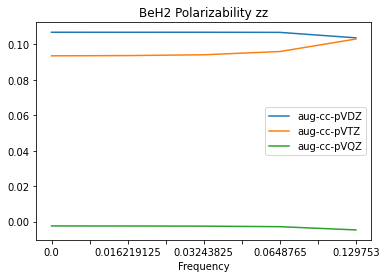

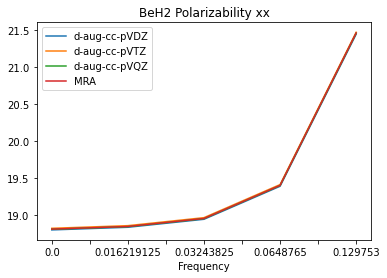

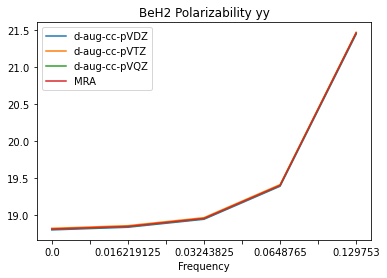

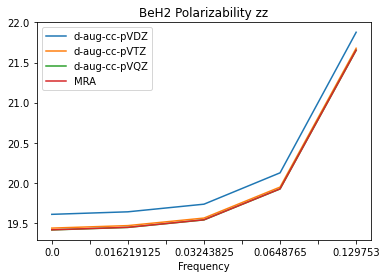

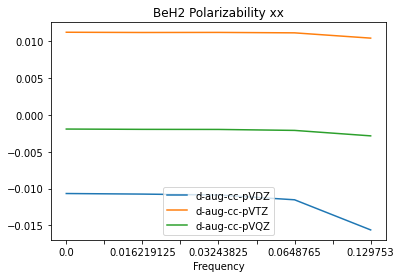

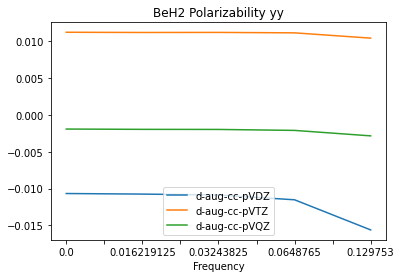

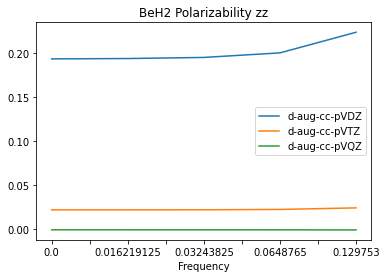

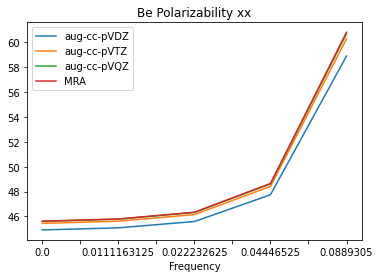

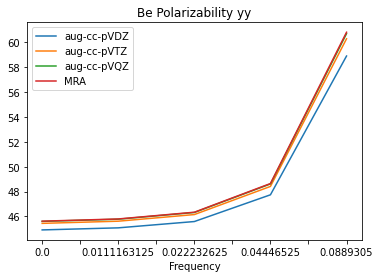

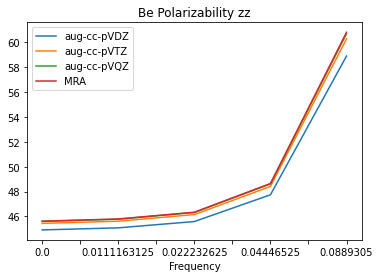

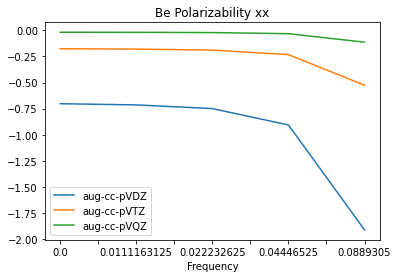

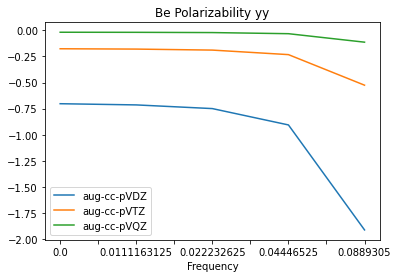

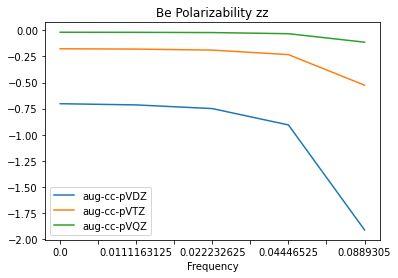

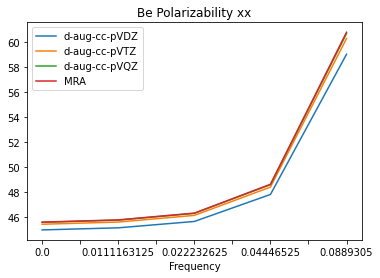

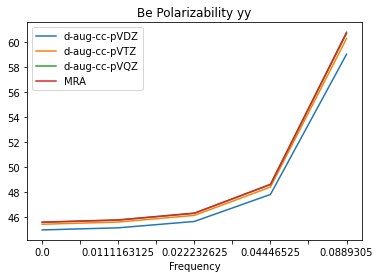

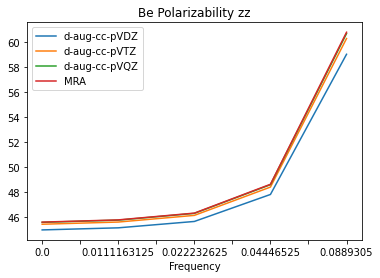

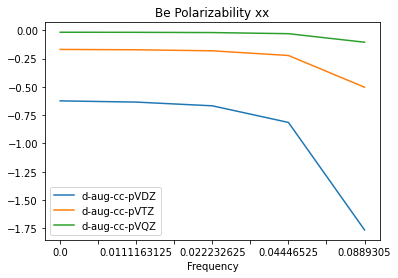

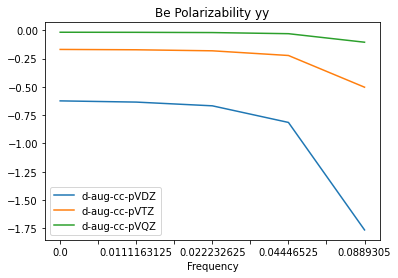

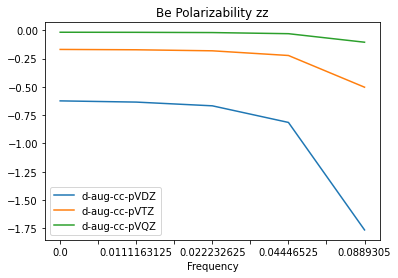

In [5]:

import glob
for mol in glob.glob('molecules/*.mol'):
    name=mol.split('/')[1].split('.')[0]
    try:
        print(name)
        basis_set_results(name,basis_list)
    except:
        print('what happened ',name)

In [6]:
from daltonRunner import DaltonRunner
dalton_reader = DaltonRunner()
ground_dalton, response_dalton = dalton_reader.get_frequency_result('Ne', 'hf', 'dipole', 'aug-cc-pVDZ')

In [7]:
def create_polar_table(mol,xc,basis_list,xx):
    
    ground_dalton, response_dalton = dalton_reader.get_frequency_result(mol, 'hf', 'dipole', basis_list[0])
    freq=response_dalton['frequencies']
    g_data={}
    xx_data=[]
    for i in range(len(freq)):
        xx_data.append({})
    for basis in basis_list:
        ground_dalton, response_dalton = dalton_reader.get_frequency_result(mol, 'hf', 'dipole', basis)
        for i in range(len(freq)):
            xx_data[i][basis]=response_dalton[xx][i]
        g_data[basis]=ground_dalton['totalEnergy']
    g_df=pd.Series(g_data)
    g_df.name='Total HF Energy'
    names=[]
    for f in freq:
        raw_f = r'{}'.format(str(f)) 
        #names.append(r'$$\alpha_{xx}('+raw_f+r')$$')
        names.append('a('+'{:.3f}'.format(f)+')')
    r_dfs=[]
    for i in range(len(freq)):
        r_dfs.append(pd.Series(xx_data[i]))
        r_dfs[i].name=names[i]
    dalton_df=pd.concat([g_df]+r_dfs,axis=1)

    moldata=FrequencyData(mol,'hf','dipole')
    moldata.polar_df[xx]
    mad_data_e={}
    mad_data_r={}
    mad_data_e['Total HF Energy']=moldata.ground_e['e_tot']

    for i in range(len(names)):
        mad_data_r[names[i]]=moldata.polar_df[xx][i]
    
    mad_data_e=pd.Series(mad_data_e)
    mad_data_r=pd.Series(mad_data_r)
    
    mad_data=pd.concat([mad_data_e,mad_data_r],axis=0)
    mad_data.name='MRA'
    return dalton_df.append(mad_data)
    
    return dalton_df


In [8]:
create_polar_table('Ne','hf',basis_list,'xx')
create_polar_table('He','hf',basis_list,'xx').iloc[:,1:]


,a(0.000),a(0.049),a(0.099),a(0.198),a(0.395)
aug-cc-pVDZ,1.303925,1.306791,1.315466,1.351399,1.518182
aug-cc-pVTZ,1.315968,1.319136,1.328739,1.368724,1.558825
aug-cc-pVQZ,1.321550,1.324887,1.335014,1.377334,1.582284
MRA,1.322330,1.325726,1.336040,1.379292,1.592828


In [9]:
create_polar_table('H2O','hf',basis_list,'xx').iloc[:,1:]


,a(0.000),a(0.020),a(0.040),a(0.079),a(0.159)
aug-cc-pVDZ,7.325093,7.334490,7.362996,7.482065,8.063255
aug-cc-pVTZ,7.723695,7.733549,7.763425,7.887907,8.488541
aug-cc-pVQZ,7.847663,7.857854,7.888747,8.017363,8.635463
MRA,7.902512,7.913071,7.945056,8.078239,8.711445


In [10]:
def create_data(mol,basis_list):
    
    res_dict={'xx':'density_residualX','yy':'density_residualY','zz':'density_residualZ'}
    
    
    moldata=FrequencyData(mol,'hf','dipole')
    xx=['xx','yy','zz']
    data=[]
    for x in xx:
        data.append(create_polar_table(mol,'hf',basis_list,x))
    average=(data[0]+data[1]+data[2])/3
    
    diff_data=average-average.loc['MRA']
    diff_data=diff_data.drop(index='MRA')
    
    polar_diff=diff_data.drop('Total HF Energy',axis=1)
    
    residuals=moldata.final_density_residuals()
    
    cleanX=residuals['density_residualX'].reset_index().drop('index',axis=1)
    cleanY=residuals['density_residualY'].reset_index().drop('index',axis=1)
    cleanZ=residuals['density_residualZ'].reset_index().drop('index',axis=1)
    
    cleanX.rename(columns={'density_residualX':'MRA density residual'},inplace=True)
    cleanY.rename(columns={'density_residualY':'MRA density residual'},inplace=True)
    cleanZ.rename(columns={'density_residualZ':'MRA density residual'},inplace=True)
    clean=(cleanX+cleanY+cleanZ)/3
    clean.index=polar_diff.T.index
    
    average=average.append(clean.T)
    average.name='Average Polarizability'
    
    
    energy_diff=diff_data['Total HF Energy']
    return average,diff_data,energy_diff,polar_diff

basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ']
data,diff_data,energy_diff,polar_diff=create_data('Be',basis_list,)
display(data)
display(diff_data)
display(polar_diff)
display(energy_diff)


,Total HF Energy,a(0.000),a(0.011),a(0.022),a(0.044),a(0.089)
aug-cc-pVDZ,-14.572379,44.913706,45.080233,45.587441,4.773805e+01,58.900395
aug-cc-pVTZ,-14.572875,45.440357,45.615188,46.147978,4.841188e+01,60.287363
aug-cc-pVQZ,-14.572969,45.598622,45.775820,46.315917,4.861241e+01,60.699528
MRA,-14.572938,45.616752,45.794736,46.337167,4.864446e+01,60.812824
MRA density residual,NaN,0.000002,0.000001,0.000002,8.372947e-07,0.000001


,Total HF Energy,a(0.000),a(0.011),a(0.022),a(0.044),a(0.089)
aug-cc-pVDZ,0.000559,-0.703045,-0.714503,-0.749726,-0.906401,-1.912429
aug-cc-pVTZ,0.000062,-0.176394,-0.179548,-0.189189,-0.232575,-0.525461
aug-cc-pVQZ,-0.000031,-0.018130,-0.018916,-0.021250,-0.032049,-0.113296


,a(0.000),a(0.011),a(0.022),a(0.044),a(0.089)
aug-cc-pVDZ,-0.703045,-0.714503,-0.749726,-0.906401,-1.912429
aug-cc-pVTZ,-0.176394,-0.179548,-0.189189,-0.232575,-0.525461
aug-cc-pVQZ,-0.018130,-0.018916,-0.021250,-0.032049,-0.113296


aug-cc-pVDZ    0.000559
aug-cc-pVTZ    0.000062
aug-cc-pVQZ   -0.000031
Name: Total HF Energy, dtype: float64

In [11]:

import matplotlib.pyplot as plt

basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ','aug-cc-pV5Z','aug-cc-pV6Z']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ','d-aug-cc-pV5Z','d-aug-cc-pV6Z']

def create_polar_diff_plot(mol,basis_list):
    
    
    title=mol
    yl=r' $\Delta\alpha_{avg}$'+r' (MRA - BASIS)'
    
    
    data,diff_data,energy_diff,polar_diff=create_data(mol,basis_list)
    polar_diff.iloc[:,:].plot(marker='o', linestyle='solid')
    plt.axhline(linewidth=2,ls='--',color='k',label="MRA Reference")
    plt.xlabel
    plt.legend(fontsize=12)
    plt.xticks(fontsize=14,rotation = 20)
    plt.title(title,fontsize=20)
    plt.ylabel(yl, fontsize=14)
    save=mol+'-'+basis_list[0]
    save='figures/'+save+'.svg'
    plt.savefig(save)
    
    latex_save=mol+'-'+basis_list[0]
    latex_save='tables/'+latex_save+'.tex'
    data=data.round(decimals=3)
    data.to_latex(latex_save,na_rep=' ')
    
    
    return data

mol_list=['Ne','H2O','H2',]



Paper: Static Polar He:  1.3222


,Total HF Energy,a(0.000),a(0.049),a(0.099),a(0.198),a(0.395)
aug-cc-pVDZ,-2.856,1.304,1.307,1.315,1.351,1.518
aug-cc-pVTZ,-2.861,1.316,1.319,1.329,1.369,1.559
aug-cc-pVQZ,-2.862,1.322,1.325,1.335,1.377,1.582
aug-cc-pV5Z,-2.862,1.321,1.325,1.335,1.378,1.589
aug-cc-pV6Z,-2.862,1.321,1.325,1.335,1.378,1.590
MRA,-2.862,1.322,1.326,1.336,1.379,1.593
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


,Total HF Energy,a(0.000),a(0.049),a(0.099),a(0.198),a(0.395)
d-aug-cc-pVDZ,-2.856,1.329,1.332,1.342,1.384,1.589
d-aug-cc-pVTZ,-2.861,1.324,1.327,1.337,1.380,1.592
d-aug-cc-pVQZ,-2.862,1.322,1.326,1.336,1.379,1.593
d-aug-cc-pV5Z,-2.862,1.321,1.324,1.335,1.378,1.592
d-aug-cc-pV6Z,-2.862,1.321,1.325,1.335,1.378,1.592
MRA,-2.862,1.322,1.326,1.336,1.379,1.593
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


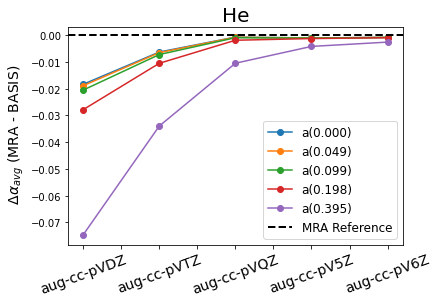

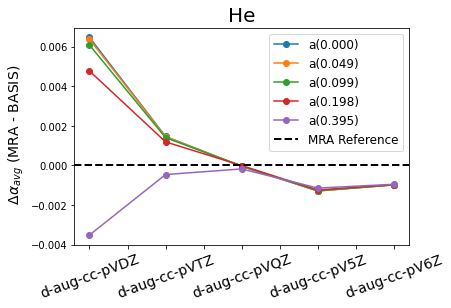

In [12]:
print('Paper: Static Polar He: ',1.3222)
d1=create_polar_diff_plot('He',basis_list)
d2=create_polar_diff_plot('He',d_basis_list)
display(d1)
display(d2)

Paper: Static Polar H2:  not given


,Total HF Energy,a(0.000),a(0.029),a(0.058),a(0.116),a(0.233)
aug-cc-pVDZ,-1.129,5.115,5.129,5.173,5.355,6.253
aug-cc-pVTZ,-1.133,5.240,5.256,5.302,5.498,6.472
aug-cc-pVQZ,-1.133,5.229,5.244,5.291,5.489,6.477
aug-cc-pV5Z,-1.134,5.223,5.239,5.286,5.483,6.475
aug-cc-pV6Z,-1.134,5.223,5.239,5.286,5.483,6.476
MRA,-1.133,5.230,5.245,5.292,5.490,6.483
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


,Total HF Energy,a(0.000),a(0.029),a(0.058),a(0.116),a(0.233)
d-aug-cc-pVDZ,-1.129,5.184,5.199,5.246,5.442,6.424
d-aug-cc-pVTZ,-1.133,5.239,5.254,5.301,5.499,6.494
d-aug-cc-pVQZ,-1.133,5.226,5.242,5.289,5.486,6.480
d-aug-cc-pV5Z,-1.134,5.223,5.239,5.285,5.483,6.475
d-aug-cc-pV6Z,-1.134,5.224,5.240,5.287,5.484,6.476
MRA,-1.133,5.230,5.245,5.292,5.490,6.483
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


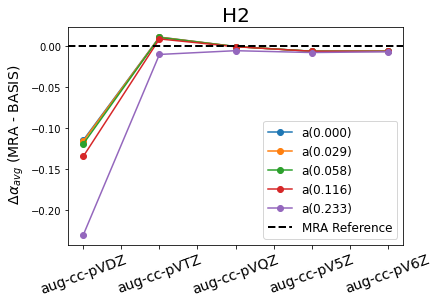

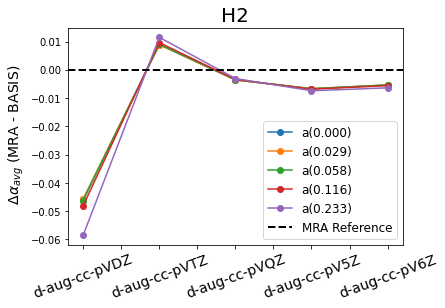

In [13]:
print('Paper: Static Polar H2: ','not given')
d1=create_polar_diff_plot('H2',basis_list)
d2=create_polar_diff_plot('H2',d_basis_list)
display(d1)
display(d2)


Paper: Static Polar Be:  45.6199


,Total HF Energy,a(0.000),a(0.011),a(0.022),a(0.044),a(0.089)
aug-cc-pVDZ,-14.572,44.914,45.080,45.587,47.738,58.900
aug-cc-pVTZ,-14.573,45.440,45.615,46.148,48.412,60.287
aug-cc-pVQZ,-14.573,45.599,45.776,46.316,48.612,60.700
MRA,-14.573,45.617,45.795,46.337,48.644,60.813
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


,Total HF Energy,a(0.000),a(0.011),a(0.022),a(0.044),a(0.089)
d-aug-cc-pVDZ,-14.572,44.993,45.160,45.670,47.830,59.050
d-aug-cc-pVTZ,-14.573,45.447,45.622,46.155,48.421,60.310
d-aug-cc-pVQZ,-14.573,45.599,45.776,46.317,48.614,60.707
MRA,-14.573,45.617,45.795,46.337,48.644,60.813
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


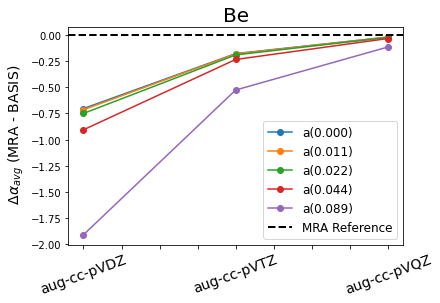

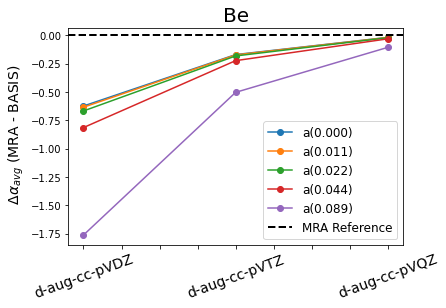

In [14]:
print('Paper: Static Polar Be: ',45.6199)
d1=create_polar_diff_plot('Be',basis_list[0:-2])
d2=create_polar_diff_plot('Be',d_basis_list[0:-2])
display(d1)
display(d2)



Paper: Static Polar Ne:  2.377


,Total HF Energy,a(0.000),a(0.046),a(0.092),a(0.184),a(0.369)
aug-cc-pVDZ,-128.496,1.832,1.835,1.843,1.877,2.044
aug-cc-pVTZ,-128.533,2.194,2.197,2.208,2.251,2.464
aug-cc-pVQZ,-128.544,2.329,2.333,2.345,2.396,2.642
aug-cc-pV5Z,-128.547,2.363,2.367,2.380,2.435,2.701
aug-cc-pV6Z,-128.547,2.370,2.374,2.387,2.443,2.717
MRA,-128.547,2.377,2.381,2.395,2.452,2.736
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


,Total HF Energy,a(0.000),a(0.046),a(0.092),a(0.184),a(0.369)
d-aug-cc-pVDZ,-128.496,2.353,2.358,2.371,2.425,2.694
d-aug-cc-pVTZ,-128.533,2.375,2.379,2.393,2.449,2.729
d-aug-cc-pVQZ,-128.544,2.380,2.384,2.398,2.455,2.738
d-aug-cc-pV5Z,-128.547,2.377,2.382,2.395,2.452,2.737
d-aug-cc-pV6Z,-128.547,2.376,2.381,2.395,2.452,2.736
MRA,-128.547,2.377,2.381,2.395,2.452,2.736
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


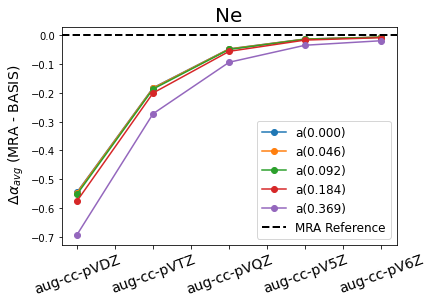

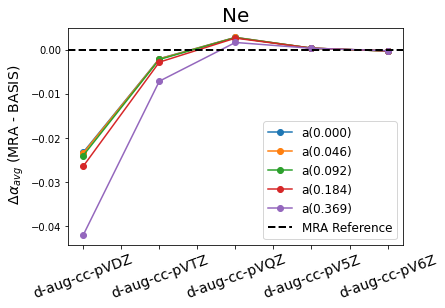

In [15]:

print('Paper: Static Polar Ne: ',2.3770)
d1=create_polar_diff_plot('Ne',basis_list)
d2=create_polar_diff_plot('Ne',d_basis_list)
display(d1)
display(d2)




,Total HF Energy,a(0.000),a(0.020),a(0.040),a(0.079),a(0.159)
aug-cc-pVDZ,-76.041,8.141,8.150,8.175,8.281,8.763
aug-cc-pVTZ,-76.061,8.428,8.437,8.464,8.575,9.079
aug-cc-pVQZ,-76.066,8.508,8.518,8.545,8.659,9.176
aug-cc-pV5Z,-76.067,8.528,8.538,8.566,8.681,9.203
aug-cc-pV6Z,-76.067,8.536,8.545,8.573,8.689,9.214
MRA,-76.067,8.542,8.552,8.580,8.695,9.215
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.001


,Total HF Energy,a(0.000),a(0.020),a(0.040),a(0.079),a(0.159)
d-aug-cc-pVDZ,-76.042,8.522,8.531,8.559,8.676,9.205
d-aug-cc-pVTZ,-76.061,8.545,8.554,8.582,8.699,9.229
d-aug-cc-pVQZ,-76.066,8.544,8.553,8.582,8.698,9.227
d-aug-cc-pV5Z,-76.067,8.542,8.551,8.579,8.696,9.225
d-aug-cc-pV6Z,-76.067,8.542,8.551,8.579,8.696,9.225
MRA,-76.067,8.542,8.552,8.580,8.695,9.215
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.001


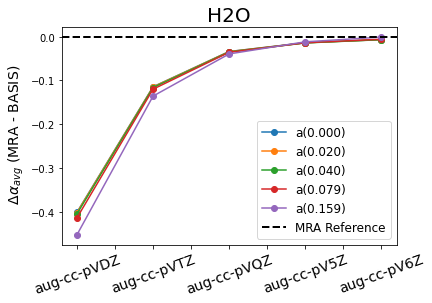

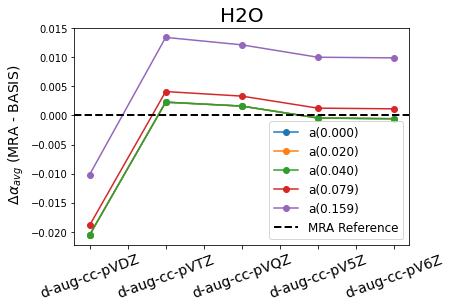

In [16]:
d1=create_polar_diff_plot('H2O',basis_list)
d2=create_polar_diff_plot('H2O',d_basis_list)
display(d1)
display(d2)


,Total HF Energy,a(0.000),a(0.016),a(0.032),a(0.065),a(0.130)
aug-cc-pVDZ,-15.768,19.040,19.074,19.177,19.600,21.527
aug-cc-pVTZ,-15.772,19.017,19.051,19.154,19.579,21.517
aug-cc-pVQZ,-15.773,19.003,19.037,19.141,19.567,21.514
MRA,-15.773,19.011,19.045,19.148,19.575,21.526
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


,Total HF Energy,a(0.000),a(0.016),a(0.032),a(0.065),a(0.130)
d-aug-cc-pVDZ,-15.769,19.068,19.102,19.206,19.634,21.590
d-aug-cc-pVTZ,-15.772,19.025,19.059,19.163,19.590,21.541
d-aug-cc-pVQZ,-15.773,19.009,19.043,19.147,19.573,21.523
MRA,-15.773,19.011,19.045,19.148,19.575,21.526
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


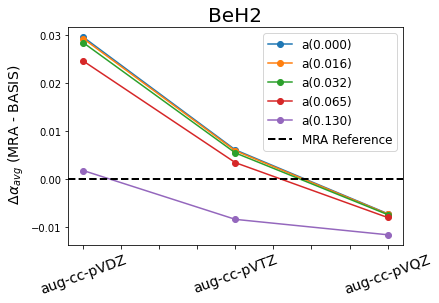

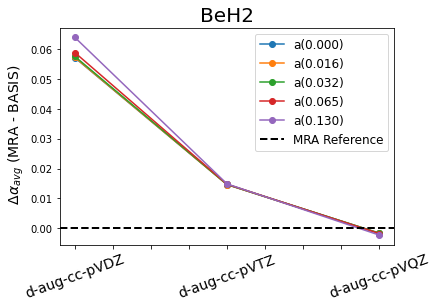

In [17]:
d1=create_polar_diff_plot('BeH2',basis_list[0:-2])
d2=create_polar_diff_plot('BeH2',d_basis_list[0:-2])
display(d1)
display(d2)

,Total HF Energy,a(0.000),a(0.014),a(0.027),a(0.055),a(0.110)
aug-cc-pVDZ,-76.828,22.801,22.821,22.882,23.133,24.223
aug-cc-pVTZ,-76.850,23.333,23.354,23.419,23.685,24.840
aug-cc-pVQZ,-76.855,23.407,23.429,23.496,23.766,24.945
aug-cc-pV5Z,-76.856,23.416,23.438,23.504,23.776,24.959
aug-cc-pV6Z,-76.856,23.419,23.441,23.507,23.780,24.966
MRA,-76.855,23.422,23.440,23.506,23.776,24.950
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


,Total HF Energy,a(0.000),a(0.014),a(0.027),a(0.055),a(0.110)
d-aug-cc-pVDZ,-76.829,23.358,23.380,23.446,23.717,24.898
d-aug-cc-pVTZ,-76.850,23.429,23.451,23.518,23.791,24.981
d-aug-cc-pVQZ,-76.855,23.422,23.444,23.511,23.784,24.973
d-aug-cc-pV5Z,-76.856,23.421,23.443,23.510,23.783,24.972
d-aug-cc-pV6Z,-76.856,23.421,23.443,23.510,23.783,24.972
MRA,-76.855,23.422,23.440,23.506,23.776,24.950
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


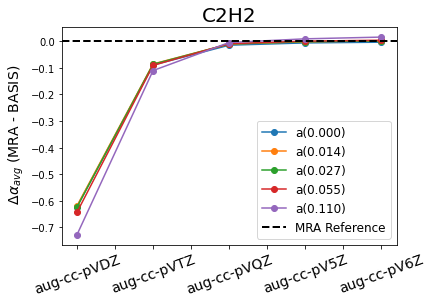

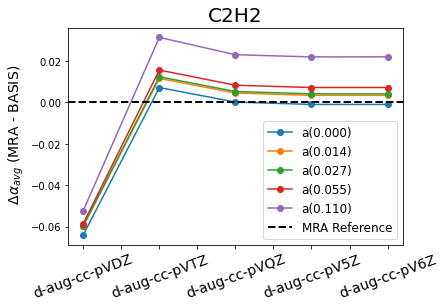

In [18]:
d1=create_polar_diff_plot('C2H2',basis_list)
d2=create_polar_diff_plot('C2H2',d_basis_list)
display(d1)
display(d2)



In [19]:

d1=create_polar_diff_plot('CH4',basis_list)
d2=create_polar_diff_plot('CH4',d_basis_list)
display(d1)
display(d2)

IndexError: list index out of range

In [ ]:

d1=create_polar_diff_plot('HCl',basis_list)
d2=create_polar_diff_plot('HCl',d_basis_list)
display(d1)
display(d2)

In [ ]:

d1=create_polar_diff_plot('HF',basis_list)
d2=create_polar_diff_plot('HF',d_basis_list)
display(d1)
display(d2)

In [ ]:

d1=create_polar_diff_plot('NH3',basis_list)
d2=create_polar_diff_plot('NH3',d_basis_list)
display(d1)
display(d2)